## Final 
### นางสาวกฤตยา สังข์ไทย 603021853-6

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

### ดึงข้อมูลเข้าสู่python

In [2]:
covid_data=pd.read_csv('C:\\Tangmo\Programming\\Python_dataviz\\Covid-19.csv')

In [3]:
covid_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0


### ตรวจสอบ missing

In [4]:
covid_data.isnull().any()

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

#### จะเห็นตัว Province/State = True แปลว่ายังมี missing อยู่ ต้องทำการกำจัด missing

### แทนค่าที่เป็น missing โดยใช้ unknown

In [5]:
covid_data['Province/State']=covid_data['Province/State'].fillna('unknown')

### ตรวจสอบ missing อีกครั้ง

In [6]:
covid_data.isnull().any()

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

#### จะเห็นว่าข้อมูลไม่มี missing แล้ว สามารถนำไปทำต่อได้

In [7]:
covid_data

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26,0,0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2,0,0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1,0,0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4,0,0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1,0,0


#### ข้อมูลของประเทศจีนและจีนแผ่นดินใหญ่ออก เนื่องจากค่าข้อมูลมันสูงกว่าค่าอื่นมาก

In [8]:
Newcovid = covid_data[covid_data['Country'] != 'China']

In [9]:
Newcovid = Newcovid[Newcovid['Country'] != 'Mainland China']

In [10]:
Newcovid = Newcovid.reset_index(drop=True)

In [11]:
Newcovid

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,32,01/22/2020 12:00:00,Washington,US,01/22/2020 12:00:00,1,0,0
1,36,01/22/2020 12:00:00,unknown,Japan,01/22/2020 12:00:00,2,0,0
2,37,01/22/2020 12:00:00,unknown,Thailand,01/22/2020 12:00:00,2,0,0
3,38,01/22/2020 12:00:00,unknown,South Korea,01/22/2020 12:00:00,1,0,0
4,51,01/23/2020 12:00:00,Hong Kong,Hong Kong,01/23/2020 12:00:00,2,0,0
5,59,01/23/2020 12:00:00,Macau,Macau,01/23/2020 12:00:00,2,0,0
6,67,01/23/2020 12:00:00,Taiwan,Taiwan,01/23/2020 12:00:00,1,0,0
7,70,01/23/2020 12:00:00,Washington,US,01/23/2020 12:00:00,1,0,0
8,74,01/23/2020 12:00:00,unknown,Japan,01/23/2020 12:00:00,1,0,0
9,75,01/23/2020 12:00:00,unknown,Thailand,01/23/2020 12:00:00,3,0,0


### ทำการแก้ไข column ' Date '

In [12]:
date = []
for i in range(Newcovid.shape[0]):
    x = Newcovid.iloc[i]['Date'].split(' ')
    x = x[0].replace('/2020', '')
    date.append(x)

In [13]:
Newcovid['Date'] = date

In [14]:
Newcovid

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,32,01/22,Washington,US,01/22/2020 12:00:00,1,0,0
1,36,01/22,unknown,Japan,01/22/2020 12:00:00,2,0,0
2,37,01/22,unknown,Thailand,01/22/2020 12:00:00,2,0,0
3,38,01/22,unknown,South Korea,01/22/2020 12:00:00,1,0,0
4,51,01/23,Hong Kong,Hong Kong,01/23/2020 12:00:00,2,0,0
5,59,01/23,Macau,Macau,01/23/2020 12:00:00,2,0,0
6,67,01/23,Taiwan,Taiwan,01/23/2020 12:00:00,1,0,0
7,70,01/23,Washington,US,01/23/2020 12:00:00,1,0,0
8,74,01/23,unknown,Japan,01/23/2020 12:00:00,1,0,0
9,75,01/23,unknown,Thailand,01/23/2020 12:00:00,3,0,0


### ทำการลบ columns ที่ไม่ต้องการ

In [15]:
del Newcovid['Sno']
del Newcovid['Last Update']

In [16]:
Newcovid

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22,Washington,US,1,0,0
1,01/22,unknown,Japan,2,0,0
2,01/22,unknown,Thailand,2,0,0
3,01/22,unknown,South Korea,1,0,0
4,01/23,Hong Kong,Hong Kong,2,0,0
5,01/23,Macau,Macau,2,0,0
6,01/23,Taiwan,Taiwan,1,0,0
7,01/23,Washington,US,1,0,0
8,01/23,unknown,Japan,1,0,0
9,01/23,unknown,Thailand,3,0,0


## สร้างตารางใหม่ที่มีเฉพาะข้อมูลของ Canada และ Finland เพื่อที่จะนำไปสร้างการนำเสนอข้อมูลใน power bi

In [17]:
Canada = Newcovid[Newcovid['Country']=='Canada']

In [18]:
Canada  = Canada .reset_index(drop=True)

In [19]:
Canada.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/26,Ontario,Canada,1,0,0
1,01/27,Ontario,Canada,1,0,0
2,01/28,Ontario,Canada,1,0,0
3,01/28,British Columbia,Canada,1,0,0
4,01/29,Ontario,Canada,2,0,0


In [20]:
US = Newcovid[Newcovid['Country']=='US']

In [22]:
US = US .reset_index(drop=True) 

In [23]:
US.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22,Washington,US,1,0,0
1,01/23,Washington,US,1,0,0
2,01/24,Washington,US,1,0,0
3,01/24,Chicago,US,1,0,0
4,01/25,Washington,US,1,0,0


### รวมตารางระหว่าง Canada กับ US 

In [24]:
df =  [Canada,US]
Can_US = pd.concat(df)

In [25]:
Can_US.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/26,Ontario,Canada,1,0,0
1,01/27,Ontario,Canada,1,0,0
2,01/28,Ontario,Canada,1,0,0
3,01/28,British Columbia,Canada,1,0,0
4,01/29,Ontario,Canada,2,0,0


In [26]:
Can_US = Can_US.reset_index(drop=True)

In [27]:
Can_US.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/26,Ontario,Canada,1,0,0
1,01/27,Ontario,Canada,1,0,0
2,01/28,Ontario,Canada,1,0,0
3,01/28,British Columbia,Canada,1,0,0
4,01/29,Ontario,Canada,2,0,0


### บันทึกตารางเป็น .csv

In [28]:
Newcovid.to_csv('Newcovid.csv')
Can_US.to_csv('Can_US.csv')

### สร้างกราฟ

Text(0.5, 1.0, 'Covid-19 2020')

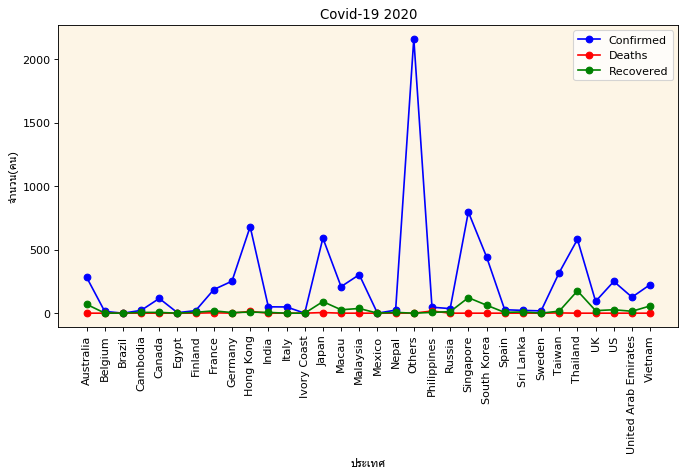

In [29]:
x = Newcovid.groupby(['Country'], as_index=False).sum()['Country']
y1 = Newcovid.groupby(['Country'], as_index=False).sum()['Confirmed']
y2 = Newcovid.groupby(['Country'], as_index=False).sum()['Deaths']
y3 = Newcovid.groupby(['Country'], as_index=False).sum()['Recovered']
plt.figure(figsize=[10,5],dpi=80)
plt.gca(facecolor='oldlace')
plt.plot(x,y1,'blue',label = "Confirmed",marker='o')
plt.plot(x,y2,'red',label = "Deaths",marker='o')
plt.plot(x,y3,'green',label = "Recovered",marker='o')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('ประเทศ',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('Covid-19 2020')

In [30]:
x = Newcovid.groupby(['Country'], as_index=False).sum()
x

,Country,Confirmed,Deaths,Recovered
0,Australia,284,0,70
1,Belgium,14,0,1
2,Brazil,0,0,0
3,Cambodia,22,0,6
4,Canada,116,0,6
5,Egypt,4,0,0
6,Finland,20,0,7
7,France,186,3,18
8,Germany,252,0,5
9,Hong Kong,681,14,8


Text(0.5, 1.0, 'กราฟแสดงจำนวนผู้ติดเชื้อ Covid-19 เดือน ม.ค.- ก.พ. 2563')

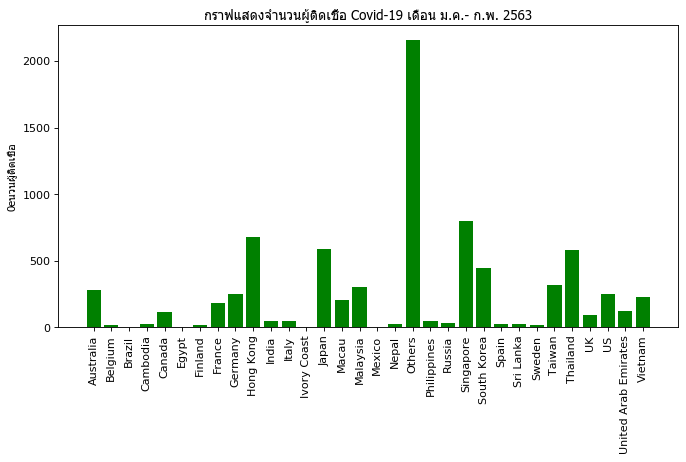

In [31]:
N = np.arange(len(x.iloc[:,0]))
plt.figure(figsize=[10,5],dpi=80)
plt.bar(N,x.iloc[:,1], align='center', color = 'green')
plt.xticks(N, x.iloc[:,0])
plt.xticks(rotation = 90)
plt.ylabel('0eนวนผู้ติดเชื้อ',fontname='Tahoma')
plt.title('กราฟแสดงจำนวนผู้ติดเชื้อ Covid-19 เดือน ม.ค.- ก.พ. 2563',fontname='Tahoma',fontsize=12)

Text(0.5, 1.0, 'Covid-19 2020 ประเทศที่มีผู้ติดเชื้อมากกว่า 100 คน')

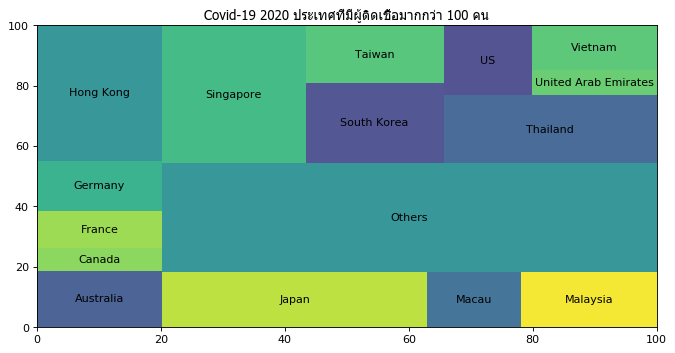

In [32]:
x=x[x['Confirmed'] > 100]
import numpy as np
import matplotlib.pyplot as plt
import squarify
plt.figure(figsize=[10,5],dpi=80)
volume = x.iloc[:,1]
labels = x.iloc[:,0]
squarify.plot(sizes=volume, label=labels, alpha=0.9)
plt.title('Covid-19 2020 ประเทศที่มีผู้ติดเชื้อมากกว่า 100 คน',fontname='Tahoma')

In [33]:
Covid_Canada = Newcovid[Newcovid['Country']=='Canada'].groupby(['Province/State'], as_index=False).sum()
Covid_Canada

,Province/State,Confirmed,Deaths,Recovered
0,British Columbia,56,0,0
1,"London, ON",15,0,6
2,Ontario,15,0,0
3,"Toronto, ON",30,0,0


Text(0.5, 1.0, 'Covid-19 in Canada')

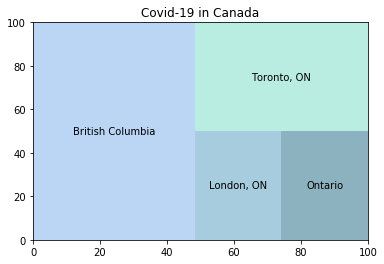

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import squarify
volume = Covid_Canada.iloc[:,1]
labels = Covid_Canada.iloc[:,0]
color_list = ['#a4c8f1', '#88bbd2', '#6699aa','#a3e7d8']
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.75)
plt.title('Covid-19 in Canada')

Text(0.5, 1.0, 'กราฟแสดงการเปรียบเทียบจำนวนผู้ติดเชื้อ,ผู้ที่ได้รับการรักษา,ผู้ที่เสียชีวิตในโรค Covid-19 ในประเทศไทย เดือน ม.ค.- ก.พ. 2563')

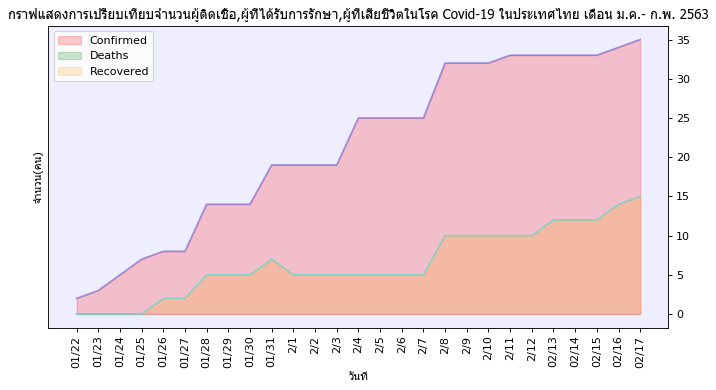

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
x = Newcovid[Newcovid['Country']=='Thailand']['Date']
y1 = Newcovid[Newcovid['Country']=='Thailand']['Confirmed']
y2 = Newcovid[Newcovid['Country']=='Thailand']['Deaths']
y3 = Newcovid[Newcovid['Country']=='Thailand']['Recovered']
plt.figure(figsize=[10,5],dpi=80)
ax = plt.gca(facecolor='#EFEEFE')
plt.fill_between( x, y1, color="r",alpha=0.2,label = "Confirmed")
plt.plot(x, y1, color="Slateblue", alpha=0.6)
plt.fill_between( x, y2, color="g",alpha=0.2,label = "Deaths")
plt.plot(x, y2, color="plum", alpha=0.6)
plt.fill_between( x, y3, color="orange",alpha=0.2,label = "Recovered")
plt.plot(x, y3, color="turquoise", alpha=0.6)
plt.legend()
plt.xticks(rotation = 90)
ax.yaxis.set_ticks_position('right')
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('กราฟแสดงการเปรียบเทียบจำนวนผู้ติดเชื้อ,ผู้ที่ได้รับการรักษา,ผู้ที่เสียชีวิตในโรค Covid-19 ในประเทศไทย เดือน ม.ค.- ก.พ. 2563',fontname='Tahoma',fontsize=12)